In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
from pathlib import Path
import numpy as np
import pandas as pd
from Bio.Phylo._io import parse
from Bio.Phylo.BaseTree import Tree as BioTree

from src.datasets.load_trees import load_trees_from_file
from src.utils.tree_utils import get_taxa_names
from src.utils.tree_utils import get_tree_height
from src.distribution_analysis.process_tree import get_observed_nodes, get_clade_split_df

from scipy.stats import ks_2samp

from collections import Counter

In [2]:

import warnings
warnings.filterwarnings('ignore')
sns.set_style("whitegrid")

In [176]:
REFERENCE_TREE_FILE = Path("data/mcmc_runs/yule-10-0.trees")
SAMPLE_TREES_FILE_1 = Path("data/distribution_validation/yule-10-0_sampled-trees_gamma-mu-sigma-beta-old-old.trees")
SAMPLE_TREES_FILE_2 = Path("data/distribution_validation/yule-10-0_sampled-trees_gamma-mu-sigma.trees")
SAMPLE_TREES_FILE_3 = Path("data/distribution_validation/yule-10-0_sampled-trees_gamma-mu-sigma-exact.trees")
SAMPLE_TREES_FILE_4 = Path("data/distribution_validation/yule-10-0_sampled-trees_mu-sigma.trees")
SAMPLE_TREES_FILE_5 = Path("data/distribution_validation/yule-10-0_sampled-trees_mu-sigma-beta-old-old.trees")
NUM_TAXA = 10

In [177]:
ref_trees = load_trees_from_file(REFERENCE_TREE_FILE)
# sample_trees_1 = load_trees_from_file(SAMPLE_TREES_FILE_1)
# sample_trees_2 = load_trees_from_file(SAMPLE_TREES_FILE_2)
# sample_trees_3 = load_trees_from_file(SAMPLE_TREES_FILE_3)
sample_trees_4 = load_trees_from_file(SAMPLE_TREES_FILE_4)
sample_trees_5 = load_trees_from_file(SAMPLE_TREES_FILE_5)

In [178]:
taxa_names = get_taxa_names(ref_trees[0])

_, sample_clade_splits_1 = get_observed_nodes(sample_trees_1, taxa_names)
_, sample_clade_splits_2 = get_observed_nodes(sample_trees_2, taxa_names)
_, sample_clade_splits_3 = get_observed_nodes(sample_trees_3, taxa_names)
_, sample_clade_splits_4 = get_observed_nodes(sample_trees_4, taxa_names)
_, sample_clade_splits_5 = get_observed_nodes(sample_trees_5, taxa_names)
_, ref_clade_splits = get_observed_nodes(ref_trees, taxa_names)

sample_branches_1 = get_clade_split_df(sample_clade_splits_1)
sample_branches_2 = get_clade_split_df(sample_clade_splits_2)
sample_branches_3 = get_clade_split_df(sample_clade_splits_3)
sample_branches_4 = get_clade_split_df(sample_clade_splits_4)
sample_branches_5 = get_clade_split_df(sample_clade_splits_5)
ref_branches = get_clade_split_df(ref_clade_splits)

In [325]:
sample_gof_1 = sample_branches_1.groupby("clade_split").apply(
    lambda s: ks_2samp(
        s.min_branch,
        ref_branches[ref_branches.clade_split == s.clade_split.iloc[0]].min_branch_down,
    ).statistic
)

sample_gof_2 = sample_branches_2.groupby("clade_split").apply(
    lambda s: ks_2samp(
        s.min_branch_down,
        ref_branches[ref_branches.clade_split == s.clade_split.iloc[0]].min_branch_down,
    ).statistic
)

sample_gof_3 = sample_branches_3.groupby("clade_split").apply(
    lambda s: ks_2samp(
        s.min_branch_down,
        ref_branches[ref_branches.clade_split == s.clade_split.iloc[0]].min_branch_down,
    ).statistic
)

sample_gof_4 = sample_branches_4.groupby("clade_split").apply(
    lambda s: ks_2samp(
        s.min_branch_down,
        ref_branches[ref_branches.clade_split == s.clade_split.iloc[0]].min_branch_down,
    ).statistic
)

sample_gof_5 = sample_branches_5.groupby("clade_split").apply(
    lambda s: ks_2samp(
        s.min_branch_down,
        ref_branches[ref_branches.clade_split == s.clade_split.iloc[0]].min_branch_down,
    ).statistic
)

In [329]:
np.mean(sample_gof_1.values)

np.float64(nan)

Text(0, 0.5, 'Model')

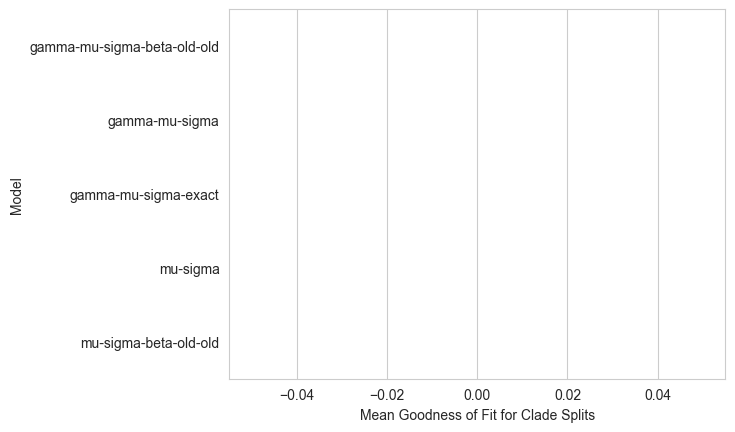

In [328]:
sns.barplot({
    "gamma-mu-sigma-beta-old-old": np.mean(sample_gof_1.values),
    "gamma-mu-sigma": np.mean(sample_gof_2.values),
    "gamma-mu-sigma-exact": np.mean(sample_gof_3.values),
    "mu-sigma": np.mean(sample_gof_4.values),
    "mu-sigma-beta-old-old": np.mean(sample_gof_5.values),
}, orient="y")
plt.xlabel("Mean Goodness of Fit for Clade Splits")
plt.ylabel("Model")

In [246]:
difference = sample_gof_1.to_frame().join(sample_gof_2.to_frame(), lsuffix="-gamma-mu-sigma-beta-old-old", rsuffix="-gamma-mu-sigma", how="inner")
difference["difference"] = difference["0-gamma-mu-sigma"] - difference["0-gamma-mu-sigma-beta-old-old"]

In [247]:
difference.mean()

0-gamma-mu-sigma-beta-old-old    0.246803
0-gamma-mu-sigma                 0.222800
difference                      -0.024003
dtype: float64

In [248]:
difference

,0-gamma-mu-sigma-beta-old-old,0-gamma-mu-sigma,difference
clade_split,,,
0000000001||0000000010,0.026343,0.016870,-0.009473
0000000001||0000000100,0.007200,0.005882,-0.001318
0000000001||0000000110,0.041374,0.037245,-0.004129
0000000011||0000000100,0.022278,0.023271,0.000993
0000000100||0000000010,0.010811,0.011462,0.000651
...,...,...,...
1111100111||0000011000,0.200000,0.175000,-0.025000
1111101000||0000010000,0.046287,0.050470,0.004183
1111101111||0000010000,0.074295,0.074086,-0.000209


In [249]:
sample_gof_2.mean()

np.float64(0.23414837036129046)

<Axes: xlabel='difference', ylabel='Count'>

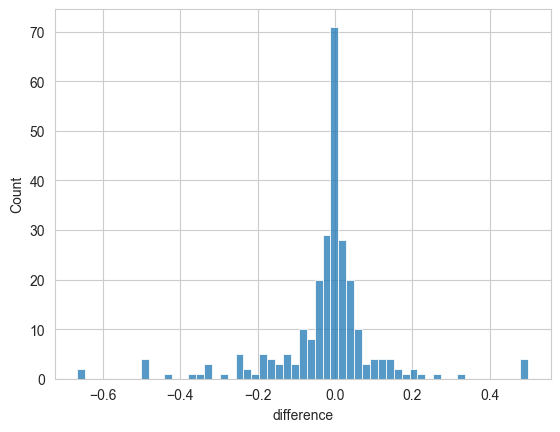

In [250]:
sns.histplot(difference.difference)

In [253]:
difference[difference.difference < 0].sort_values("difference", ascending=True).head(20)

,0-gamma-mu-sigma-beta-old-old,0-gamma-mu-sigma,difference
clade_split,,,
0000010111||1000001000,1.000000,0.333333,-0.666667
1001111000||0110000000,1.000000,0.333333,-0.666667
1000011000||0110000000,1.000000,0.500000,-0.500000
0001100111||1000001000,1.000000,0.500000,-0.500000
0001101000||0000010000,1.000000,0.500000,-0.500000
0111110000||1000001000,1.000000,0.500000,-0.500000
0111100000||1000011000,0.750000,0.321429,-0.428571
0001100000||1000001000,0.535714,0.164286,-0.371429
0001101111||1110010000,0.571429,0.214286,-0.357143


In [265]:
ref_counter["0000000111||0000011000"]

7

In [308]:
from collections import Counter
ref_counter = Counter(ref_branches.clade_split)
difference["count"] = difference.index.map(lambda x: ref_counter[x])
difference[difference["count"] > 60].sort_values("difference", ascending=False).head(10)

,0-gamma-mu-sigma-beta-old-old,0-gamma-mu-sigma,difference,count
clade_split,,,,
0000000111||1111100000,0.070734,0.137255,0.066521,78
0000011111||1000000000,0.068993,0.134912,0.065919,100
1000001111||0001100000,0.092898,0.155625,0.062727,64
0110001111||0000010000,0.080667,0.143260,0.062593,250
0110001111||1000010000,0.106847,0.164119,0.057272,147
1111100000||0000010000,0.080124,0.131052,0.050928,110
0110011111||1001100000,0.080740,0.126280,0.045540,134
0000011111||1111100000,0.086171,0.130827,0.044656,102
1000010111||0001100000,0.047574,0.081760,0.034186,271


In [86]:
difference[difference.index == "0110000111||0001100000"]

,0-gamma-mu-sigma-beta-old-old,0-gamma-mu-sigma,difference
clade_split,,,
0110000111||0001100000,0.142857,0.571429,0.428571


In [74]:
len(sample_branches_1[sample_branches_1.clade_split == "0000011111||1001100000"])

18

In [156]:
ref_branches[ref_branches.clade_split == "0000010000||0110001000"].min_branch_down

598       0.039454
7636      0.039981
11743     0.039477
37885     0.024509
39183     0.030712
            ...   
300919    0.040247
301407    0.034142
307023    0.037842
311242    0.023698
312341    0.034068
Name: min_branch_down, Length: 61, dtype: float64

(0.0, 0.05)

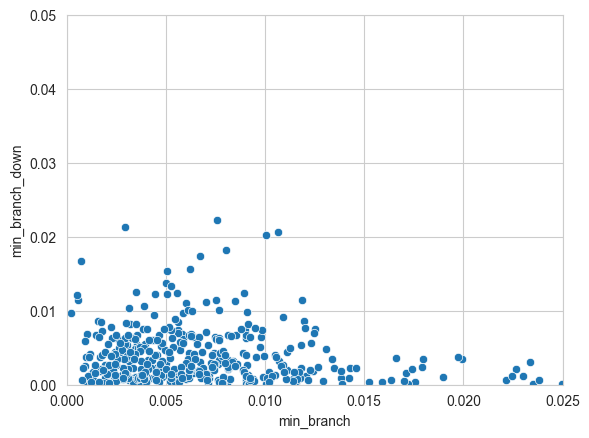

In [315]:
sns.scatterplot(
    x=sample_branches_1[sample_branches_1.clade_split == "1000010111||0001100000"].min_branch,
    y=sample_branches_1[sample_branches_1.clade_split == "1000010111||0001100000"].min_branch_down,
)
plt.xlim((0, 0.025))
plt.ylim((0, 0.05))

(0.0, 0.05)

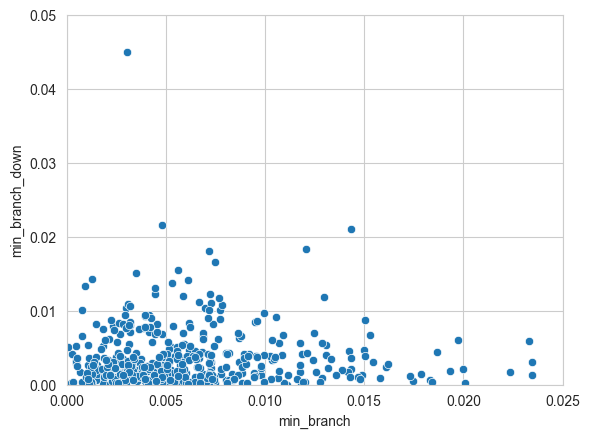

In [316]:
sns.scatterplot(
    x=sample_branches_2[sample_branches_2.clade_split == "1000010111||0001100000"].min_branch,
    y=sample_branches_2[sample_branches_2.clade_split == "1000010111||0001100000"].min_branch_down,
)
plt.xlim((0, 0.025))
plt.ylim((0, 0.05))

(0.0, 0.05)

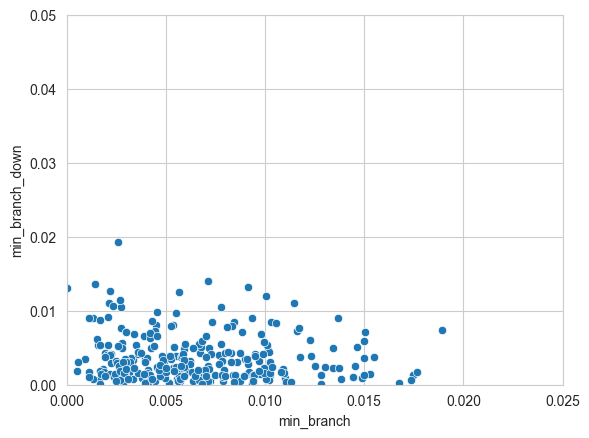

In [317]:
sns.scatterplot(
    x=ref_branches[ref_branches.clade_split == "1000010111||0001100000"].min_branch,
    y=ref_branches[ref_branches.clade_split == "1000010111||0001100000"].min_branch_down,
)
plt.xlim((0, 0.025))
plt.ylim((0, 0.05))

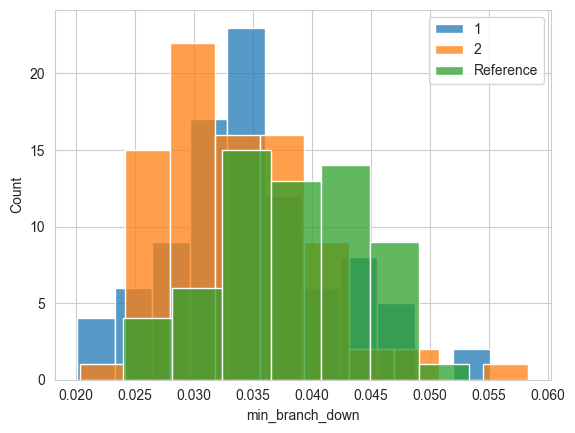

In [324]:
sns.histplot(
    x=sample_branches_1[sample_branches_1.clade_split == "0111100000||0000010000"].min_branch_down,
    label="1"
)
sns.histplot(
    x=sample_branches_2[sample_branches_2.clade_split == "0111100000||0000010000"].min_branch_down,
    label="2"
)
sns.histplot(
    x=ref_branches[ref_branches.clade_split == "0111100000||0000010000"].min_branch_down,
    label="Reference",
)

plt.legend()

In [320]:
np.corrcoef(
    np.log(sample_branches_1[sample_branches_1.clade_split == "0000000111||0110001000"].min_branch.fillna(0)),
    np.log(sample_branches_1[sample_branches_1.clade_split == "0000000111||0110001000"].height.fillna(0)),
)

array([[ 1.        , -0.08689918],
       [-0.08689918,  1.        ]])

In [240]:
np.corrcoef(
    sample_branches_2[sample_branches_2.clade_split == "0000000111||0110001000"].min_branch,
    sample_branches_2[sample_branches_2.clade_split == "0000000111||0110001000"].min_branch_down,
)

array([[ 1.        , -0.02049647],
       [-0.02049647,  1.        ]])

clade_split
0000000001||0000000010             NaN
0000000001||0000000100             NaN
0000000001||0000000110   -1.388903e-06
0000000011||0000000100   -1.751288e-07
0000000100||0000000010             NaN
                              ...     
1111100111||0000011000   -8.452225e-06
1111101000||0000010000   -4.099847e-06
1111101111||0000010000   -5.258856e-06
1111110000||0000001000    2.771587e-07
1111110111||0000001000   -6.447979e-07
Length: 279, dtype: float64

In [226]:
sample_gof_1

(np.float64(-0.13086911818117142),
 np.float64(-0.06174997497480198),
 np.float64(-0.000344369024026595))